## Part 2: PyTorch Implementation

Now let's explore similar tensor operations in PyTorch. First, we'll set up the PyTorch environment and cover basic tensor operations.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Check for GPU availability
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA Device Name: {torch.cuda.get_device_name(0)}")

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Create basic tensors
# From Python list
scalar = torch.tensor(3)
vector = torch.tensor([1, 2, 3, 4])
matrix = torch.tensor([[1, 2], [3, 4], [5, 6]])
tensor_3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

# Print tensor information
print("Scalar:", scalar)
print("Shape:", scalar.shape)
print("Datatype:", scalar.dtype)
print("\nVector:", vector)
print("Shape:", vector.shape)
print("\nMatrix:", matrix)
print("Shape:", matrix.shape)
print("\n3D Tensor:", tensor_3d)
print("Shape:", tensor_3d.shape)

# Creating tensors with specific types
float_tensor = torch.tensor([1.2, 3.4, 5.6], dtype=torch.float32)
int_tensor = torch.tensor([1, 2, 3], dtype=torch.int32)
bool_tensor = torch.tensor([True, False, True], dtype=torch.bool)

print("\nFloat tensor:", float_tensor)
print("Int tensor:", int_tensor)
print("Boolean tensor:", bool_tensor)

# Create tensors with PyTorch functions
zeros = torch.zeros(2, 3)
ones = torch.ones(2, 2, 2)
random_normal = torch.randn(3, 3)  # mean=0, std=1
random_uniform = torch.rand(2, 3)  # uniform from [0, 1)

print("\nZeros tensor:", zeros)
print("\nOnes tensor:", ones)
print("\nRandom normal tensor:", random_normal)
print("\nRandom uniform tensor:", random_uniform)

# Device management
cpu_tensor = torch.tensor([1, 2, 3], device='cpu')
print("\nCPU Tensor:", cpu_tensor)

# Only create CUDA tensor if GPU is available
if torch.cuda.is_available():
    gpu_tensor = torch.tensor([1, 2, 3], device='cuda')
    print("GPU Tensor:", gpu_tensor)

    # Moving tensors between devices
    moved_to_cpu = gpu_tensor.cpu()
    print("GPU Tensor moved to CPU:", moved_to_cpu)
else:
    print("No GPU available, skipping CUDA tensor examples")

PyTorch version: 2.5.1+cu124
CUDA Available: False
Scalar: tensor(3)
Shape: torch.Size([])
Datatype: torch.int64

Vector: tensor([1, 2, 3, 4])
Shape: torch.Size([4])

Matrix: tensor([[1, 2],
        [3, 4],
        [5, 6]])
Shape: torch.Size([3, 2])

3D Tensor: tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
Shape: torch.Size([2, 2, 2])

Float tensor: tensor([1.2000, 3.4000, 5.6000])
Int tensor: tensor([1, 2, 3], dtype=torch.int32)
Boolean tensor: tensor([ True, False,  True])

Zeros tensor: tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones tensor: tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

Random normal tensor: tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617]])

Random uniform tensor: tensor([[0.2696, 0.4414, 0.2969],
        [0.8317, 0.1053, 0.2695]])

CPU Tensor: tensor([1, 2, 3])
No GPU available, skipping CUDA tensor examples


## Basic Tensor Operations in PyTorch

Let's explore fundamental tensor operations in PyTorch:
- Mathematical operations
- Matrix multiplication
- Reshaping and transposing
- View vs Copy operations (a key concept in PyTorch)

In [ ]:
# Create sample tensors
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

# Basic mathematical operations
addition = a + b  # Element-wise addition
subtraction = a - b  # Element-wise subtraction
multiplication = a * b  # Element-wise multiplication
division = a / b  # Element-wise division

print("Tensor a:\n", a)
print("Tensor b:\n", b)
print("\nAddition (a + b):\n", addition)
print("\nSubtraction (a - b):\n", subtraction)
print("\nMultiplication (a * b):\n", multiplication)
print("\nDivision (a / b):\n", division)

# Matrix multiplication
matrix_mult = torch.matmul(a, b)
matrix_mult_2 = a @ b  # Python 3.5+ syntax

print("\nMatrix multiplication (torch.matmul(a, b)):\n", matrix_mult)
print("\nMatrix multiplication (a @ b):\n", matrix_mult_2)

# Reshaping tensors
c = torch.tensor([1, 2, 3, 4, 5, 6])
reshaped = c.reshape(2, 3)
reshaped_2 = c.reshape(3, 2)

print("\nOriginal tensor c:", c)
print("Shape:", c.shape)
print("\nReshaped [2,3]:\n", reshaped)
print("\nReshaped [3,2]:\n", reshaped_2)

# Transposing tensors
d = torch.tensor([[1, 2, 3], [4, 5, 6]])
transposed = d.t()  # Only works for 2D tensors
transposed_any_dim = d.transpose(0, 1)  # Works for any dimension

print("\nOriginal tensor d:\n", d)
print("Shape:", d.shape)
print("\nTransposed:\n", transposed)
print("Shape:", transposed.shape)

# View vs Copy - a key concept in PyTorch
original = torch.tensor([[1, 2, 3, 4],
                         [5, 6, 7, 8]])

# View creates a new tensor that shares the same underlying data
view = original.view(4, 2)

# Clone creates a copy with new memory
copy = original.clone().view(4, 2)

print("\nOriginal tensor:\n", original)
print("View:\n", view)
print("Copy:\n", copy)

# Modifying the original affects the view but not the copy
original[0, 0] = 99
print("\nAfter modifying original[0,0] = 99:")
print("Original tensor:\n", original)
print("View (should be affected):\n", view)
print("Copy (should not be affected):\n", copy)

# Contiguous tensors
# After operations like transpose, tensors may not be contiguous in memory
e = torch.tensor([[1, 2, 3], [4, 5, 6]])
e_t = e.t()
print("\nIs transposed tensor contiguous?", e_t.is_contiguous())

# Make contiguous using contiguous() method
e_t_cont = e_t.contiguous()
print("After calling contiguous():", e_t_cont.is_contiguous())

# Advanced indexing and slicing
f = torch.randn(4, 5)
print("\nRandom tensor f:\n", f)
print("\nFirst row:", f[0])
print("\nFirst column:", f[:, 0])
print("\nSubmatrix (first 2 rows, first 3 columns):\n", f[:2, :3])

# Boolean indexing
mask = f > 0
positive_values = f[mask]
print("\nBoolean mask (f > 0):\n", mask)
print("\nPositive values only:", positive_values)

Tensor a:
 tensor([[1., 2.],
        [3., 4.]])
Tensor b:
 tensor([[5., 6.],
        [7., 8.]])

Addition (a + b):
 tensor([[ 6.,  8.],
        [10., 12.]])

Subtraction (a - b):
 tensor([[-4., -4.],
        [-4., -4.]])

Multiplication (a * b):
 tensor([[ 5., 12.],
        [21., 32.]])

Division (a / b):
 tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])

Matrix multiplication (torch.matmul(a, b)):
 tensor([[19., 22.],
        [43., 50.]])

Matrix multiplication (a @ b):
 tensor([[19., 22.],
        [43., 50.]])

Original tensor c: tensor([1, 2, 3, 4, 5, 6])
Shape: torch.Size([6])

Reshaped [2,3]:
 tensor([[1, 2, 3],
        [4, 5, 6]])

Reshaped [3,2]:
 tensor([[1, 2],
        [3, 4],
        [5, 6]])

Original tensor d:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3])

Transposed:
 tensor([[1, 4],
        [2, 5],
        [3, 6]])
Shape: torch.Size([3, 2])

Original tensor:
 tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
View:
 tensor([[1, 2],
        [3, 4],
      

## Broadcasting in PyTorch

PyTorch also follows the same broadcasting rules as NumPy and TensorFlow, allowing operations between tensors of different shapes when certain conditions are met.

Let's explore how broadcasting works in PyTorch:

Matrix shape: torch.Size([2, 3])
Vector shape: torch.Size([3])
Scalar shape: torch.Size([])

Matrix:
 tensor([[1., 2., 3.],
        [4., 5., 6.]])

Vector: tensor([10., 20., 30.])

Scalar: tensor(5.)

Matrix + Vector (broadcasting):
 tensor([[11., 22., 33.],
        [14., 25., 36.]])

Matrix + Scalar (broadcasting):
 tensor([[ 6.,  7.,  8.],
        [ 9., 10., 11.]])

Tensor a shape: torch.Size([3, 2])
Tensor b shape: torch.Size([3, 1])
Result shape (a + b): torch.Size([3, 2])

Tensor a:
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

Tensor b:
 tensor([[10.],
        [20.],
        [30.]])

Result (a + b):
 tensor([[11., 12.],
        [23., 24.],
        [35., 36.]])

Batch matrix multiplication result shape: torch.Size([3, 2, 5])

Original vector d: tensor([1, 2, 3])
Original vector e: tensor([4, 5, 6])
d.unsqueeze(1) shape: torch.Size([3, 1])
e.unsqueeze(0) shape: torch.Size([1, 3])
Outer product (d.unsqueeze(1) * e.unsqueeze(0)):
 tensor([[ 4,  5,  6],
        [ 8, 10, 12]

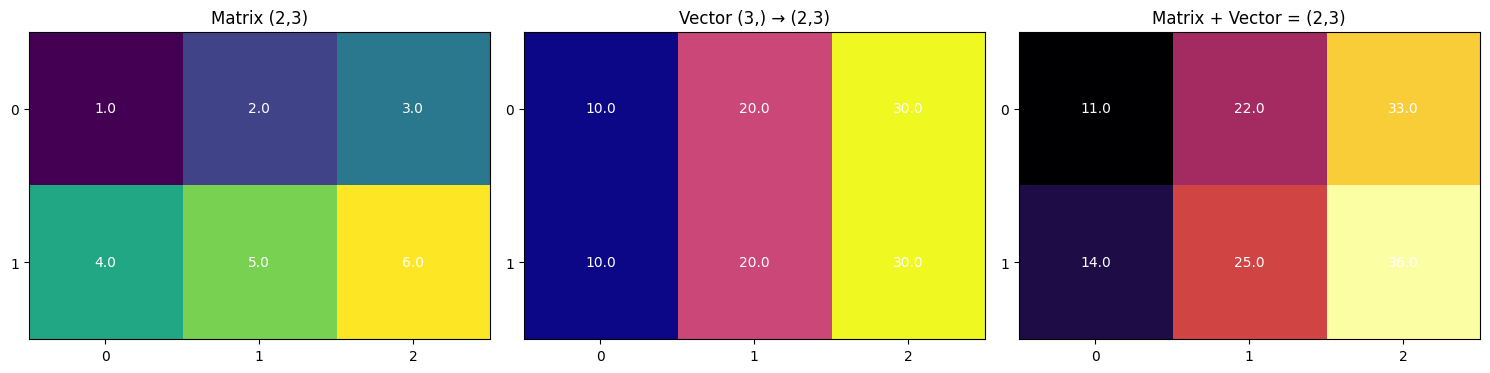

In [ ]:
# Create tensors of different shapes
matrix = torch.tensor([[1, 2, 3],
                       [4, 5, 6]], dtype=torch.float32)  # Shape: (2, 3)
vector = torch.tensor([10, 20, 30], dtype=torch.float32)  # Shape: (3,)
scalar = torch.tensor(5, dtype=torch.float32)            # Shape: ()

# Broadcasting with addition
matrix_plus_vector = matrix + vector
matrix_plus_scalar = matrix + scalar

print("Matrix shape:", matrix.shape)
print("Vector shape:", vector.shape)
print("Scalar shape:", scalar.shape)
print("\nMatrix:\n", matrix)
print("\nVector:", vector)
print("\nScalar:", scalar)

print("\nMatrix + Vector (broadcasting):\n", matrix_plus_vector)
print("\nMatrix + Scalar (broadcasting):\n", matrix_plus_scalar)

# More complex broadcasting example
a = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float32)  # Shape: (3, 2)
b = torch.tensor([[10], [20], [30]], dtype=torch.float32)        # Shape: (3, 1)
c = a + b  # Broadcasting

print("\nTensor a shape:", a.shape)
print("Tensor b shape:", b.shape)
print("Result shape (a + b):", c.shape)
print("\nTensor a:\n", a)
print("\nTensor b:\n", b)
print("\nResult (a + b):\n", c)

# Broadcasting in matrix multiplication
# Create a batch of matrices
batch_a = torch.randn(3, 2, 4)  # 3 matrices of shape 2x4
batch_b = torch.randn(1, 4, 5)  # 1 matrix of shape 4x5 (will be broadcast)

# Perform batched matrix multiplication
batch_result = torch.bmm(batch_a, batch_b.expand(3, 4, 5))
print("\nBatch matrix multiplication result shape:", batch_result.shape)

# Broadcasting with unsqueeze
d = torch.tensor([1, 2, 3])
e = torch.tensor([4, 5, 6])
outer_product = d.unsqueeze(1) * e.unsqueeze(0)

print("\nOriginal vector d:", d)
print("Original vector e:", e)
print("d.unsqueeze(1) shape:", d.unsqueeze(1).shape)
print("e.unsqueeze(0) shape:", e.unsqueeze(0).shape)
print("Outer product (d.unsqueeze(1) * e.unsqueeze(0)):\n", outer_product)

# Visualize broadcasting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original matrix
axes[0].imshow(matrix.numpy(), cmap='viridis')
axes[0].set_title('Matrix (2,3)')
axes[0].set_xticks(np.arange(3))
axes[0].set_yticks(np.arange(2))

# Vector (broadcasted)
broadcasted_vector = np.tile(vector.numpy(), (2, 1))
axes[1].imshow(broadcasted_vector, cmap='plasma')
axes[1].set_title('Vector (3,) → (2,3)')
axes[1].set_xticks(np.arange(3))
axes[1].set_yticks(np.arange(2))

# Result
axes[2].imshow(matrix_plus_vector.numpy(), cmap='inferno')
axes[2].set_title('Matrix + Vector = (2,3)')
axes[2].set_xticks(np.arange(3))
axes[2].set_yticks(np.arange(2))

for ax in axes:
    for i in range(2):
        for j in range(3):
            if ax == axes[0]:
                text = f"{matrix[i, j].item()}"
            elif ax == axes[1]:
                text = f"{vector[j].item()}"
            else:
                text = f"{matrix_plus_vector[i, j].item()}"
            ax.text(j, i, text, ha="center", va="center", color="w")

plt.tight_layout()
plt.show()

## Advanced Indexing and Slicing in PyTorch

PyTorch provides powerful indexing capabilities that allow for complex data manipulation:
- Boolean masking
- Index tensors
- Fancy indexing
- Scatter and gather operations

## Advanced Indexing and Slicing in PyTorch

PyTorch provides powerful indexing capabilities that allow for complex data manipulation:
- Boolean masking
- Index tensors
- Fancy indexing
- Scatter and gather operations

In [6]:
# Create a sample tensor
tensor = torch.tensor([
    [[1, 2, 3], [4, 5, 6]],
    [[7, 8, 9], [10, 11, 12]],
    [[13, 14, 15], [16, 17, 18]]
])
print("Original tensor shape:", tensor.shape)
print("Original tensor:\n", tensor)

# Basic slicing
print("\nFirst element (tensor[0]):\n", tensor[0])
print("\nFirst row of each 2D slice (tensor[:, 0]):\n", tensor[:, 0])
print("\nFirst column of each row (tensor[:, :, 0]):\n", tensor[:, :, 0])

# Slicing with ranges
print("\nFirst two elements (tensor[0:2]):\n", tensor[0:2])
print("\nLast dimension with step (tensor[:, :, ::2]):\n", tensor[:, :, ::2])

# Boolean masking
mask = tensor > 9
masked_tensor = tensor[mask]
print("\nBoolean mask (tensor > 9):\n", mask)
print("Values where tensor > 9:", masked_tensor)

# Using index tensors
indices = torch.tensor([0, 2])  # Select first and third elements
selected = tensor[indices]
print("\nSelected elements using indices tensor:", selected.shape)
print(selected)

# Advanced indexing
rows = torch.tensor([0, 1, 2])
cols = torch.tensor([0, 1, 0])
selected_rows_cols = tensor[rows, cols]
print("\nSelected using row and column indices:", selected_rows_cols.shape)
print(selected_rows_cols)

# Gather operation (similar to tf.gather)
dim = 0  # Dimension to gather along
index = torch.tensor([[0, 1], [2, 0]])  # Indices to gather
gathered = torch.gather(tensor[:, 0, :], dim, index)
print("\nGathered tensor along dimension", dim, ":\n", gathered)

# Scatter operation - fixed version
# Make sure dtype matches between source and destination
scatter_src = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
scatter_idx = torch.tensor([[0, 1], [2, 3]], dtype=torch.long)  # Indices must be long
scatter_out = torch.zeros(4, 4)
scatter_out.scatter_(0, scatter_idx, scatter_src)  # dim, index, src
print("\nScattered tensor:\n", scatter_out)

# Where operation (conditional selection)
condition = tensor > 9
result = torch.where(condition, tensor * 2, tensor)
print("\nConditional selection (double values > 9):\n", result)

# Masking and replacing values
tensor_copy = tensor.clone()
tensor_copy[tensor_copy > 9] = 0
print("\nReplacing values > 9 with zeros:\n", tensor_copy)

# Non-contiguous slicing and indexing
non_contiguous = tensor[::2, :, ::2]  # Skip every other element in 1st and 3rd dims
print("\nNon-contiguous slice:", non_contiguous.shape)
print("Is contiguous:", non_contiguous.is_contiguous())
contiguous_version = non_contiguous.contiguous()
print("After making contiguous:", contiguous_version.is_contiguous())

Original tensor shape: torch.Size([3, 2, 3])
Original tensor:
 tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]]])

First element (tensor[0]):
 tensor([[1, 2, 3],
        [4, 5, 6]])

First row of each 2D slice (tensor[:, 0]):
 tensor([[ 1,  2,  3],
        [ 7,  8,  9],
        [13, 14, 15]])

First column of each row (tensor[:, :, 0]):
 tensor([[ 1,  4],
        [ 7, 10],
        [13, 16]])

First two elements (tensor[0:2]):
 tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])

Last dimension with step (tensor[:, :, ::2]):
 tensor([[[ 1,  3],
         [ 4,  6]],

        [[ 7,  9],
         [10, 12]],

        [[13, 15],
         [16, 18]]])

Boolean mask (tensor > 9):
 tensor([[[False, False, False],
         [False, False, False]],

        [[False, False, False],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  T

## Autograd: Automatic Differentiation in PyTorch

One of PyTorch's key features is its automatic differentiation engine called Autograd. It records operations on tensors and builds a computational graph, allowing for efficient calculation of gradients.

Let's explore how to compute gradients in PyTorch:

In [7]:
# Create tensors with gradients enabled
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)

# Simple function: f(x) = x^2
y = x.pow(2)

# Compute gradient
# We need to provide a gradient argument for backward
# For a tensor with multiple elements, we often want the sum
z = y.sum()
z.backward()

print("Tensor x:\n", x)
print("Gradient w.r.t. x (should be 2x):\n", x.grad)

# Reset gradients (they accumulate by default)
x.grad.zero_()

# More complex expression
y = x * x + 3 * x + 5
z = y.mean()  # Average over all elements
z.backward()

print("\nFunction: x² + 3x + 5, averaged")
print("Gradient w.r.t. x:\n", x.grad)

# Multiple inputs and outputs
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(3.0, requires_grad=True)

# Function with multiple inputs
y1 = x1**2 + x2
y2 = x1 * x2**2

# To compute gradients for multiple outputs, we calculate them one at a time
y1.backward(retain_graph=True)  # retain_graph=True keeps the computational graph
print("\nInputs: x1 =", x1.item(), ", x2 =", x2.item())
print("Outputs: y1 = x1² + x2 =", y1.item(), ", y2 = x1 * x2² =", y2.item())
print("∂y1/∂x1 =", x1.grad.item())  # Gradient of y1 w.r.t. x1
print("∂y1/∂x2 =", x2.grad.item())  # Gradient of y1 w.r.t. x2

# Reset gradients before computing the next gradients
x1.grad.zero_()
x2.grad.zero_()

# Now compute gradients for y2
y2.backward()
print("∂y2/∂x1 =", x1.grad.item())  # Gradient of y2 w.r.t. x1
print("∂y2/∂x2 =", x2.grad.item())  # Gradient of y2 w.r.t. x2

# Higher-order derivatives
x3 = torch.tensor(5.0, requires_grad=True)

# First-order derivative
y3 = x3**3
y3.backward(create_graph=True)  # create_graph=True allows for higher-order gradients
first_derivative = x3.grad.clone()  # Should be 3x²

# Second-order derivative
x3.grad.backward()  # Differentiate the first derivative
second_derivative = x3.grad  # Should be 6x

print("\nInput x3 =", x3.item())
print("f(x) = x³ =", y3.item())
print("First derivative (3x²) =", first_derivative.item())
print("Second derivative (6x) =", second_derivative.item())

# Using with neural networks
# Create a simple model
inputs = torch.randn(32, 10)
w = torch.randn(10, 5, requires_grad=True)
b = torch.zeros(5, requires_grad=True)

# Forward pass
outputs = inputs @ w + b
loss = outputs.pow(2).mean()

# Backward pass
loss.backward()

print("\nSimple Model Loss:", loss.item())
print("Gradient of w shape:", w.grad.shape)
print("Gradient of b shape:", b.grad.shape)

# No grad context for inference
with torch.no_grad():
    inference_output = inputs @ w + b
    # No gradients are computed or stored

print("\nInference output computed with torch.no_grad():", inference_output.shape)
print("requires_grad =", inference_output.requires_grad)  # Should be False

Tensor x:
 tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
Gradient w.r.t. x (should be 2x):
 tensor([[2., 4.],
        [6., 8.]])

Function: x² + 3x + 5, averaged
Gradient w.r.t. x:
 tensor([[1.2500, 1.7500],
        [2.2500, 2.7500]])

Inputs: x1 = 2.0 , x2 = 3.0
Outputs: y1 = x1² + x2 = 7.0 , y2 = x1 * x2² = 18.0
∂y1/∂x1 = 4.0
∂y1/∂x2 = 1.0
∂y2/∂x1 = 9.0
∂y2/∂x2 = 12.0

Input x3 = 5.0
f(x) = x³ = 125.0
First derivative (3x²) = 75.0
Second derivative (6x) = 105.0

Simple Model Loss: 5.09912633895874
Gradient of w shape: torch.Size([10, 5])
Gradient of b shape: torch.Size([5])

Inference output computed with torch.no_grad(): torch.Size([32, 5])
requires_grad = False


/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:825: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at ../torch/csrc/autograd/engine.cpp:1201.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


## Einstein Summation (einsum) in PyTorch

Just like in TensorFlow, PyTorch also provides the powerful `einsum` operation for expressing complex tensor operations concisely.

Let's explore how to use einsum in PyTorch:

In [8]:
# Create sample tensors
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)
c = torch.tensor([1, 2, 3], dtype=torch.float32)
d = torch.tensor([4, 5, 6], dtype=torch.float32)

print("Tensor a:\n", a)
print("Shape:", a.shape)
print("\nTensor b:\n", b)
print("Shape:", b.shape)

# Matrix transpose using einsum
# 'ij->ji' means "take indices i,j and return them as j,i"
transpose_a = torch.einsum('ij->ji', a)
print("\nTranspose of a using einsum ('ij->ji'):\n", transpose_a)
print("Standard transpose:\n", a.t())

# Matrix multiplication using einsum
# 'ij,jk->ik' means "sum over j in the first and second tensors"
matmul_ab = torch.einsum('ij,jk->ik', a, b)
print("\nMatrix multiplication using einsum ('ij,jk->ik'):\n", matmul_ab)
print("Standard matmul:\n", a @ b)

# Dot product of vectors using einsum
# 'i,i->' means "sum over i in both tensors"
dot_cd = torch.einsum('i,i->', c, d)
print("\nDot product using einsum ('i,i->'):", dot_cd.item())
print("Standard dot product:", torch.dot(c, d).item())

# Outer product of vectors using einsum
# 'i,j->ij' means "no summation, just create all combinations"
outer_cd = torch.einsum('i,j->ij', c, d)
print("\nOuter product using einsum ('i,j->ij'):\n", outer_cd)
print("Standard outer product:\n", torch.outer(c, d))

# Batch matrix multiplication
# Create 3D tensors (batch of matrices)
batch_a = torch.randn(3, 2, 4)  # 3 matrices of shape 2x4
batch_b = torch.randn(3, 4, 5)  # 3 matrices of shape 4x5

# 'bij,bjk->bik' means "for each item in batch, do matrix multiplication"
batch_matmul = torch.einsum('bij,bjk->bik', batch_a, batch_b)
print("\nBatch matrix multiplication shape:", batch_matmul.shape)
print("Should be equivalent to standard batch matmul:", torch.bmm(batch_a, batch_b).shape)

# Trace of a matrix (sum of diagonal elements)
trace_a = torch.einsum('ii->', a)
print("\nTrace of a using einsum ('ii->'):", trace_a.item())
print("Standard trace:", torch.trace(a).item())

# Element-wise multiplication
element_mult = torch.einsum('ij,ij->ij', a, b)
print("\nElement-wise multiplication using einsum ('ij,ij->ij'):\n", element_mult)
print("Standard element-wise multiplication:\n", a * b)

# Diagonal extraction
diag_a = torch.einsum('ii->i', a)
print("\nDiagonal of a using einsum ('ii->i'):", diag_a)
print("Standard diagonal:", torch.diag(a))

# Sum all elements
sum_a = torch.einsum('ij->', a)
print("\nSum of all elements using einsum ('ij->'):", sum_a.item())
print("Standard sum:", a.sum().item())

Tensor a:
 tensor([[1., 2.],
        [3., 4.]])
Shape: torch.Size([2, 2])

Tensor b:
 tensor([[5., 6.],
        [7., 8.]])
Shape: torch.Size([2, 2])

Transpose of a using einsum ('ij->ji'):
 tensor([[1., 3.],
        [2., 4.]])
Standard transpose:
 tensor([[1., 3.],
        [2., 4.]])

Matrix multiplication using einsum ('ij,jk->ik'):
 tensor([[19., 22.],
        [43., 50.]])
Standard matmul:
 tensor([[19., 22.],
        [43., 50.]])

Dot product using einsum ('i,i->'): 32.0
Standard dot product: 32.0

Outer product using einsum ('i,j->ij'):
 tensor([[ 4.,  5.,  6.],
        [ 8., 10., 12.],
        [12., 15., 18.]])
Standard outer product:
 tensor([[ 4.,  5.,  6.],
        [ 8., 10., 12.],
        [12., 15., 18.]])

Batch matrix multiplication shape: torch.Size([3, 2, 5])
Should be equivalent to standard batch matmul: torch.Size([3, 2, 5])

Trace of a using einsum ('ii->'): 5.0
Standard trace: 5.0

Element-wise multiplication using einsum ('ij,ij->ij'):
 tensor([[ 5., 12.],
        [2

## Custom Operations and Memory Management in PyTorch

PyTorch allows you to define custom operations and provides fine-grained control over memory management. Let's explore:

1. How to create custom autograd functions
2. How to optimize memory usage with in-place operations
3. Performance considerations with CPU vs. GPU operations

In [9]:
import time
import torch.nn as nn
import torch.nn.functional as F

# 1. Custom Autograd Function
class CustomReLU(torch.autograd.Function):
    """
    Custom implementation of ReLU with custom gradient.
    """
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input.clamp(min=0)  # Forward pass: max(0, x)

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0  # Backward pass: gradient is 0 where input < 0
        return grad_input

# Use our custom ReLU
custom_relu = CustomReLU.apply

# Test the function
test_input = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0], requires_grad=True)
result = custom_relu(test_input)
result.sum().backward()

print("Input:", test_input.data)
print("Output of custom ReLU:", result.data)
print("Gradient:", test_input.grad)

# Reset the gradient
test_input.grad.zero_()

# Compare with standard ReLU
standard_result = F.relu(test_input)
standard_result.sum().backward()
print("\nStandard ReLU gradient:", test_input.grad)

# 2. Memory Management - In-place Operations
# Create tensors
x = torch.randn(1000, 1000, requires_grad=True)
y = torch.randn(1000, 1000, requires_grad=True)

# Standard operation (creates new memory)
def standard_op():
    return x + y

# In-place operation (reuses memory but has limitations with autograd)
def inplace_op():
    x_clone = x.clone()
    x_clone.add_(y)  # In-place addition (note the underscore)
    return x_clone

# Memory comparison
import sys
standard_result = standard_op()
inplace_result = inplace_op()

# Reset the gradients
if x.grad is not None:
    x.grad.zero_()
if y.grad is not None:
    y.grad.zero_()

# 3. Performance: CPU vs. GPU (if available)
def time_operation(operation, iterations=100):
    start_time = time.time()
    for _ in range(iterations):
        result = operation()
        # Force computation to complete
        if isinstance(result, torch.Tensor):
            result.cpu()
    end_time = time.time()
    return (end_time - start_time) / iterations * 1000  # ms

# Benchmark on CPU
a_cpu = torch.randn(1000, 1000)
b_cpu = torch.randn(1000, 1000)

cpu_time = time_operation(lambda: a_cpu @ b_cpu)
print(f"\nMatrix multiplication on CPU: {cpu_time:.4f} ms")

# Benchmark on GPU if available
if torch.cuda.is_available():
    a_gpu = a_cpu.cuda()
    b_gpu = b_cpu.cuda()

    # Warmup
    for _ in range(10):
        a_gpu @ b_gpu

    # Time GPU operations
    gpu_time = time_operation(lambda: a_gpu @ b_gpu)
    print(f"Matrix multiplication on GPU: {gpu_time:.4f} ms")
    print(f"Speedup: {cpu_time / gpu_time:.2f}x")

# Memory optimization example: reusing tensors in a loop
def inefficient_loop():
    result = torch.zeros(10)
    for i in range(100):
        temp = torch.randn(1000, 1000)  # Creates new tensor each time
        result[i % 10] += temp.sum().item()
    return result

def efficient_loop():
    result = torch.zeros(10)
    temp = torch.randn(1000, 1000)  # Create tensor once, reuse it
    for i in range(100):
        temp.normal_()  # In-place random generation
        result[i % 10] += temp.sum().item()
    return result

# Time comparison
inefficient_time = time_operation(inefficient_loop, iterations=5)
efficient_time = time_operation(efficient_loop, iterations=5)
print(f"\nInefficient loop time: {inefficient_time:.4f} ms")
print(f"Efficient loop time: {efficient_time:.4f} ms")
print(f"Improvement: {inefficient_time / efficient_time:.2f}x")

Input: tensor([-2., -1.,  0.,  1.,  2.])
Output of custom ReLU: tensor([0., 0., 0., 1., 2.])
Gradient: tensor([0., 0., 1., 1., 1.])

Standard ReLU gradient: tensor([0., 0., 0., 1., 1.])

Matrix multiplication on CPU: 39.6601 ms

Inefficient loop time: 701.8473 ms
Efficient loop time: 496.1609 ms
Improvement: 1.41x


## Integration with einops Library

The `einops` library provides a powerful and intuitive way to manipulate tensors through operations like rearrange, reduce, and repeat. It offers a more readable alternative to PyTorch's built-in reshaping functions.

Let's explore how to use einops with PyTorch:

In [14]:
# Install einops if not already installed
!pip install -q einops
import einops

# Create sample tensor - USING FLOAT DATATYPE
x = torch.tensor([
    [[1, 2, 3, 4], [5, 6, 7, 8]],
    [[9, 10, 11, 12], [13, 14, 15, 16]]
], dtype=torch.float32)  # Explicitly use float32
print("Original tensor shape:", x.shape)  # [2, 2, 4]
print("Original tensor:\n", x)

# Reshaping with einops.rearrange
# 'b h w -> b (h w)' means "convert height and width dimensions into a single dimension"
flattened = einops.rearrange(x, 'b h w -> b (h w)')
print("\nFlattened tensor shape:", flattened.shape)
print("Flattened tensor:\n", flattened)

# PyTorch equivalent
pytorch_flattened = x.reshape(2, -1)
print("\nPyTorch flattened tensor:\n", pytorch_flattened)

# Transpose with einops
# 'b h w -> h b w' means "move height dimension to batch position"
transposed = einops.rearrange(x, 'b h w -> h b w')
print("\nTransposed tensor shape:", transposed.shape)
print("Transposed tensor:\n", transposed)

# PyTorch equivalent
pytorch_transposed = x.permute(1, 0, 2)
print("\nPyTorch transposed tensor:\n", pytorch_transposed)

# Reducing dimensions with einops.reduce
# 'b h w -> b w' means "reduce along height dimension by taking mean"
mean_height = einops.reduce(x, 'b h w -> b w', 'mean')
print("\nHeight-reduced tensor shape:", mean_height.shape)
print("Height-reduced tensor (mean):\n", mean_height)

# PyTorch equivalent
pytorch_mean_height = x.mean(dim=1)
print("\nPyTorch height-reduced tensor:\n", pytorch_mean_height)

# Summing with einops.reduce
sum_all = einops.reduce(x, 'b h w -> ', 'sum')
print("\nSum of all elements:", sum_all.item())

# Repeating with einops.repeat
# 'h w -> b h w' means "add a batch dimension of size 3"
repeated = einops.repeat(x[0], 'h w -> b h w', b=3)
print("\nRepeated tensor shape:", repeated.shape)
print("Repeated tensor (first slice repeated 3 times in batch dim):\n", repeated)

# Complex transformation with einops
# Rearrange a batch of images from [batch, height, width, channels] to [batch, channels, height, width]
fake_images = torch.randn(4, 16, 16, 3)  # [batch, height, width, channels]
rearranged = einops.rearrange(fake_images, 'b h w c -> b c h w')
print("\nRearranged images shape:", rearranged.shape)  # [batch, channels, height, width]

# Creating a sliding window view with einops - Fixed approach
h, w = 28, 28  # Image dimensions
kernel_h, kernel_w = 3, 3  # Kernel dimensions

# Create a sample image
image = torch.arange(h * w).reshape(1, 1, h, w).float()

# Use unfold for cleaner sliding window extraction
# This creates a view without copying data
patches = image.unfold(2, kernel_h, 1).unfold(3, kernel_w, 1)
# Reshape to [batch, num_patches, patch_size]
batch_size, channels, output_h, output_w, kh, kw = patches.shape
patches = patches.permute(0, 2, 3, 1, 4, 5).reshape(batch_size, output_h * output_w, channels * kh * kw)

print("\nPatches from sliding window using unfold:")
print("Original image shape:", image.shape)
print("Unfolded patches shape:", patches.shape)
print("Number of patches:", patches.shape[1])
print("Patch size:", patches.shape[2])

Original tensor shape: torch.Size([2, 2, 4])
Original tensor:
 tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.]],

        [[ 9., 10., 11., 12.],
         [13., 14., 15., 16.]]])

Flattened tensor shape: torch.Size([2, 8])
Flattened tensor:
 tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12., 13., 14., 15., 16.]])

PyTorch flattened tensor:
 tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12., 13., 14., 15., 16.]])

Transposed tensor shape: torch.Size([2, 2, 4])
Transposed tensor:
 tensor([[[ 1.,  2.,  3.,  4.],
         [ 9., 10., 11., 12.]],

        [[ 5.,  6.,  7.,  8.],
         [13., 14., 15., 16.]]])

PyTorch transposed tensor:
 tensor([[[ 1.,  2.,  3.,  4.],
         [ 9., 10., 11., 12.]],

        [[ 5.,  6.,  7.,  8.],
         [13., 14., 15., 16.]]])

Height-reduced tensor shape: torch.Size([2, 4])
Height-reduced tensor (mean):
 tensor([[ 3.,  4.,  5.,  6.],
        [11., 12., 13., 14.]])

PyTorch height-reduce

In [17]:
# Memory Management in PyTorch - Essential Techniques

# 1. Basic memory tracking
if torch.cuda.is_available():
    print(f"GPU memory allocated: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
    print(f"GPU memory reserved: {torch.cuda.memory_reserved() / 1e6:.2f} MB")

# 2. Create tensors (without pinning to avoid GPU dependency)
tensor_a = torch.randn(1000, 1000)
tensor_b = torch.randn(1000, 1000)

# 3. No gradient tracking for inference
with torch.no_grad():
    output = tensor_a @ tensor_b

# 4. In-place operations to save memory
x = torch.ones(1000)
x.add_(5)  # In-place addition (note the underscore)

# 5. Other in-place operations
y = torch.randn(10, 10)
y.zero_()  # Fill with zeros in-place
z = torch.ones(10, 10)
z.fill_(3.14)  # Fill with value in-place

# 6. Make non-contiguous tensors contiguous for performance
a = torch.randn(10, 10)
a_t = a.t()  # Transpose makes tensor non-contiguous
a_t_cont = a_t.contiguous()  # Make contiguous for better performance

# 7. Clear unused tensors
del tensor_a, tensor_b

print("Memory management best practices in PyTorch:")
print("1. Use in-place operations (tensor.add_() instead of tensor + value)")
print("2. Use torch.no_grad() for inference")
print("3. Explicitly delete unused tensors with 'del'")
print("4. Call torch.cuda.empty_cache() when needed")
print("5. Use .to(device) to move tensors between CPU and GPU")
print("6. Make tensors contiguous with .contiguous() for better performance")

Memory management best practices in PyTorch:
1. Use in-place operations (tensor.add_() instead of tensor + value)
2. Use torch.no_grad() for inference
3. Explicitly delete unused tensors with 'del'
4. Call torch.cuda.empty_cache() when needed
5. Use .to(device) to move tensors between CPU and GPU
6. Make tensors contiguous with .contiguous() for better performance


In [18]:
# Create a comparison summary
print("## Comparing TensorFlow and PyTorch ##\n")

print("TensorFlow Advantages:")
print("✓ Strong deployment ecosystem (TF Serving, TFLite, TFX)")
print("✓ Excellent production-ready tools")
print("✓ Compatible with various hardware accelerators (TPUs)")
print("✓ Static graph optimization for performance")
print("✓ Keras integration for high-level model building")

print("\nPyTorch Advantages:")
print("✓ Pythonic API and intuitive design")
print("✓ Dynamic computation graph")
print("✓ Easier debugging experience")
print("✓ Popular in research communities")
print("✓ Natural implementation of dynamic neural networks")

print("\nCommon Features:")
print("✓ Tensor operations (creation, reshaping, mathematical operations)")
print("✓ Automatic differentiation")
print("✓ GPU acceleration")
print("✓ Deep learning primitives")
print("✓ Support for distributed training")

print("\nSample Neural Network Implementation Comparison:")

print("\nTensorFlow:")
print("""
# Define model
class SimpleModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(10)

    def call(self, x):
        x = self.dense1(x)
        return self.dense2(x)

# Compile and train
model = SimpleModel()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32)
""")

print("\nPyTorch:")
print("""
# Define model
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense1 = nn.Linear(784, 128)
        self.dense2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.dense1(x))
        return self.dense2(x)

# Training loop
model = SimpleModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

for epoch in range(5):
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
""")

## Comparing TensorFlow and PyTorch ##

TensorFlow Advantages:
✓ Strong deployment ecosystem (TF Serving, TFLite, TFX)
✓ Excellent production-ready tools
✓ Compatible with various hardware accelerators (TPUs)
✓ Static graph optimization for performance
✓ Keras integration for high-level model building

PyTorch Advantages:
✓ Pythonic API and intuitive design
✓ Dynamic computation graph
✓ Easier debugging experience
✓ Popular in research communities
✓ Natural implementation of dynamic neural networks

Common Features:
✓ Tensor operations (creation, reshaping, mathematical operations)
✓ Automatic differentiation
✓ GPU acceleration
✓ Deep learning primitives
✓ Support for distributed training

Sample Neural Network Implementation Comparison:

TensorFlow:

# Define model
class SimpleModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(10)
        
    def call